# Supernova distances and redshifts - part I

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression

At high redshifts, the relation between distance and redshift can be studied through Type Ia Supernovae, which are standard candles. Here it follow some supernova data.

(35.0, 50.0)

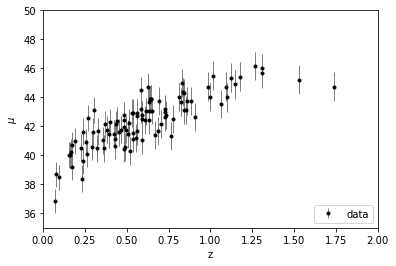

In [49]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

I can recall the relation between the magnitude $\mu$ and the redshift $z$:

</center> $$ \mu = m - M = 5 \log_{10}\left( \frac{d_L}{pc} \right) $$ </center>

**Linear regression**

In [50]:
# reshape
z_sample_r = z_sample[:, np.newaxis]
mu_sample_r = mu_sample[:, np.newaxis]

In [51]:
z = np.linspace(0.01, 2, 1000)

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(z_sample_r, mu_sample_r, sample_weight=1.0)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
X_new = np.array([[0], [2]])
y_pred_lin = lin_reg.predict(X_new)

[39.56505555] [[4.64711848]]


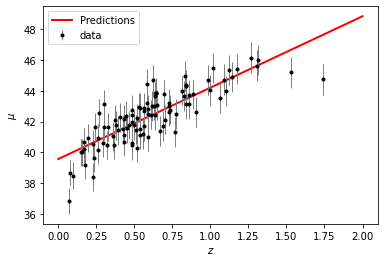

Here we are under-fitting the data


In [53]:
plt.plot(X_new, y_pred_lin, "-r", linewidth=2, label="Predictions")
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("$z$")
plt.ylabel("$\mu$")
plt.legend(loc="upper left")
plt.show()

print('Here we are under-fitting the data')

**Polynomial Regression**

In [54]:
degree = 3
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(z_sample_r, mu_sample)

y_pred_pol = model.predict(z[:, np.newaxis])
n_constraints = degree + 1

print(model.coef_)

[38.49130243  8.23905057 -2.20391808 -0.15168104]


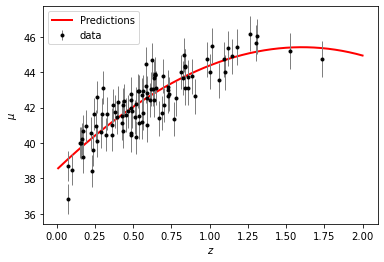

In [55]:
plt.plot(z, y_pred_pol, "-r", linewidth=2, label="Predictions")
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("$z$")
plt.ylabel("$\mu$")
plt.legend(loc="upper left")
plt.show()

I try with some other degrees

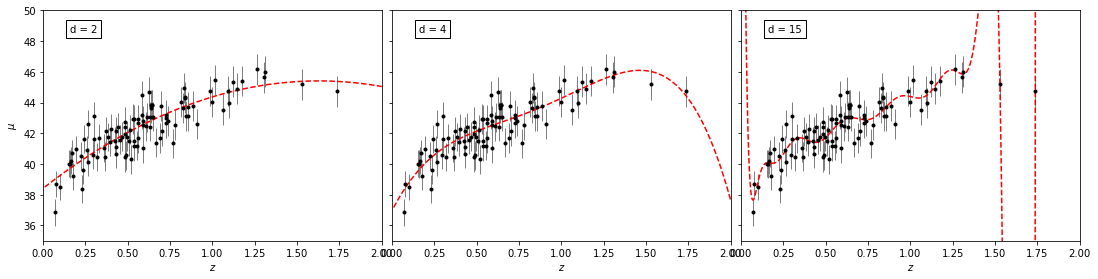

Maybe the right degree for our fit is around 2 or 3
For a degree bigger than 4 we may over-fit the data


In [56]:
fig = plt.figure(figsize=(16, 4))
fig.subplots_adjust(wspace=0.03, bottom=0.15,
                    top=0.95, left=0.07, right=0.97)

for i, d in enumerate([2, 4, 15]):
    ax = fig.add_subplot(131 + i)
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

    model = PolynomialRegression(d)
    model.fit(z_sample_r, mu_sample, dmu)
    y_fit_poly = model.predict(z[:, np.newaxis])

    ax.plot(z, y_fit_poly, '--r')
    if i in (1, 2):
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_ylabel('$\mu$')
    ax.set_xlabel('$z$')
    ax.text(0.08, 0.94, "d = %i" % d, transform=ax.transAxes,
            ha='left', va='top',
            bbox=dict(ec='k', fc='w'))
    
    ax.set_xlim(0,2)
    ax.set_ylim(35,50)

plt.show()

print('Maybe the right degree for our fit is around 2 or 3')
print('For a degree bigger than 4 we may over-fit the data')

Let's try to get higher with degrees.

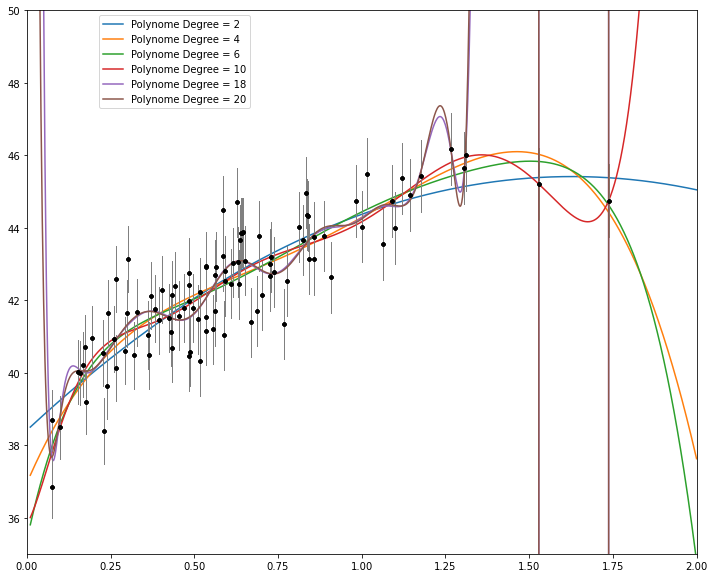

In [57]:
fig = plt.figure(figsize=(12, 10))

degrees = [2, 4, 6, 10, 18, 20]

for i, d in enumerate(degrees):  
     
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

    model = PolynomialRegression(d)
    model.fit(z_sample_r, mu_sample, dmu)
    y_fit_poly = model.predict(z[:, np.newaxis])

    plt.plot(z, y_fit_poly, '-', label='Polynome Degree = %i' % d)
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1.0))
    
plt.show()

I can see that, the higher the degree is, the more the model is overfitting the data.

**Basis function regression**

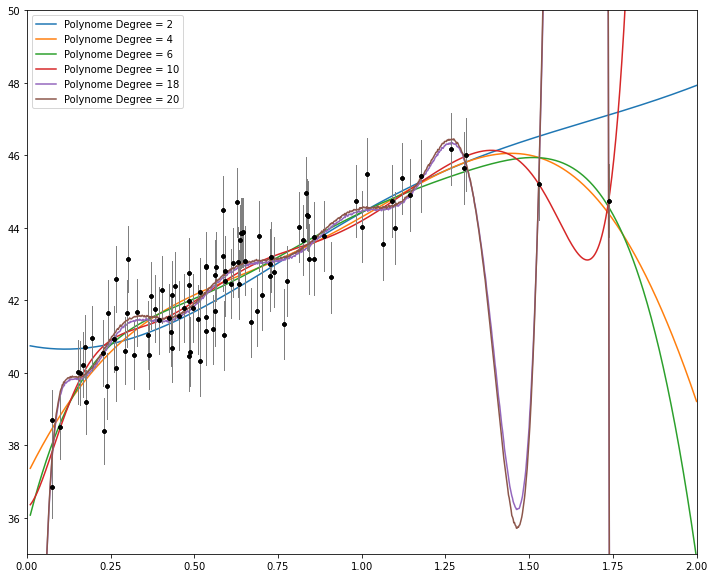

In [58]:
from astroML.linear_model import BasisFunctionRegression

fig = plt.figure(figsize=(12, 10))

degrees = [2, 4, 6, 10, 18, 20]

for i, d in enumerate(degrees):  
     
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    
    X_gridtest = np.linspace(0,2,d)[:, np.newaxis]
    sigma_test = 0.9
    model = BasisFunctionRegression('gaussian', mu=X_gridtest, sigma=sigma_test)
    model.fit(z_sample_r, mu_sample, dmu)
    y_fit_basis = model.predict(z[:, np.newaxis])

    plt.plot(z, y_fit_basis, '-', label='Polynome Degree = %i' % d)
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.legend(loc = 'best') 
    
plt.show()

**Kernel Regression**

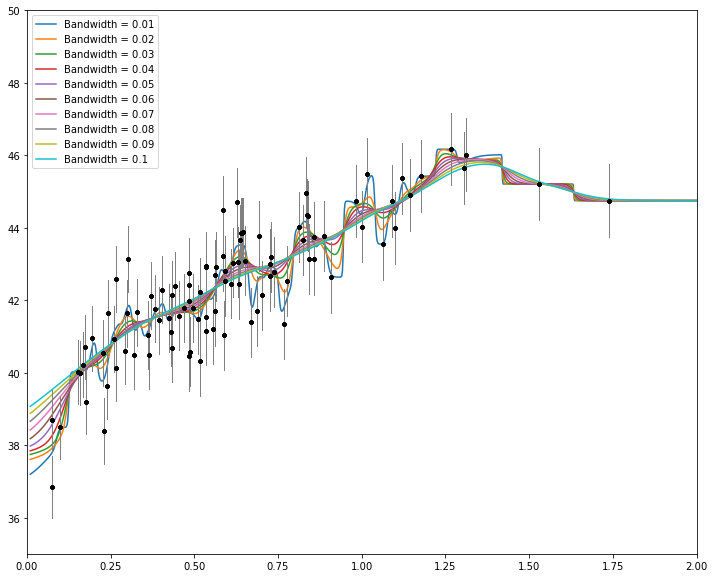

In [59]:
from astroML.linear_model import NadarayaWatson

fig = plt.figure(figsize=(12, 10))

band = np.round(np.linspace(0.01, 0.1, 10), 2)

for i, b in enumerate(band):  
     
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    
    model = NadarayaWatson('gaussian', b)
    model.fit(z_sample_r, mu_sample)
    y_fit_kernel = model.predict(z[:, np.newaxis])

    plt.plot(z, y_fit_kernel, '-', label='Bandwidth = ' + str(b))
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.legend(loc = 'upper left') 
    
plt.show()

**Implementing of a cross-validation procedure**

In [60]:
from sklearn.model_selection import train_test_split

mu = np.array([mu_sample, dmu]).T

z_train, z_val, mudmu_train, mudmu_val = train_test_split(z_sample_r, mu, test_size=0.3, random_state=42)
mu_train, dmu_train = mudmu_train.T
mu_val, dmu_val = mudmu_val.T

In [61]:
def geterror(X, y, classifier):
    
    return np.sqrt( np.sum(( y - classifier.predict(X) )**2) / len(X) )

def fitanderror(classifier):
    
    classifier.fit(z_train, mu_train, dmu_train)
    error_train = geterror(z_train, mu_train, classifier)
    error_validation  = geterror(z_val, mu_val, classifier)
    return error_train, error_validation

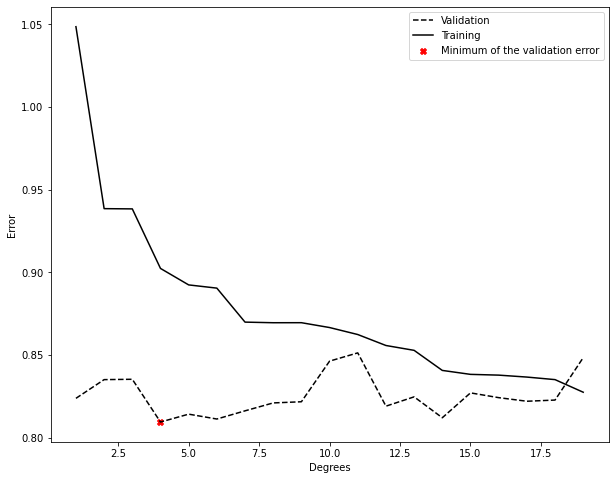

The minimum validation error corresponds to a 4-degree polynomial fit


In [62]:
degrees = np.arange(1, 20)

fig = plt.figure(figsize=(10, 8))

err_train, err_test = [], []

for d in degrees:  
    
    classifier = PolynomialRegression(d)
    error_train, error_validation = fitanderror(classifier)
    err_train.append(error_train)
    err_test.append(error_validation)
    
j = np.argmin(err_test)
x_min = degrees[j]
y_min = err_test[j]

plt.plot(degrees, err_test, '--k', label = 'Validation')
plt.plot(degrees, err_train, '-k', label = 'Training')
plt.scatter(x_min, y_min, marker='X', c='r', label = 'Minimum of the validation error')

plt.xlabel('Degrees')
plt.ylabel('Error')
plt.legend(loc = 'best')
    
plt.show()

print('The minimum validation error corresponds to a ' + str(x_min) + '-degree polynomial fit')

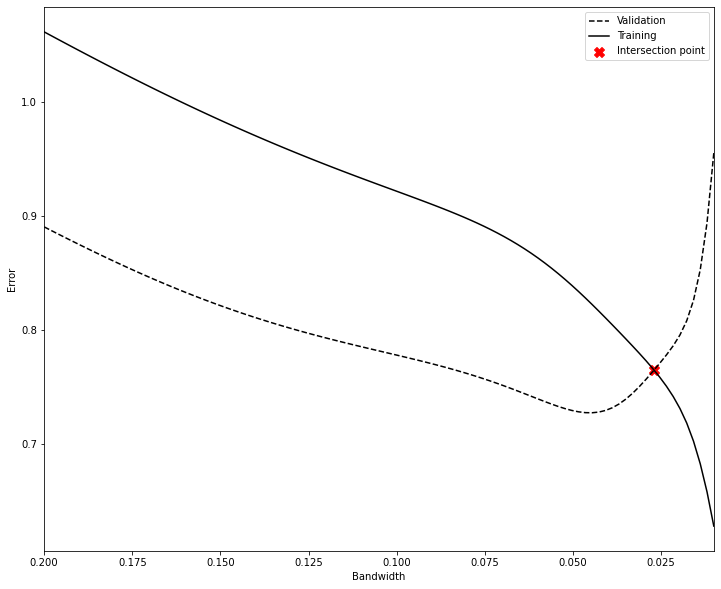

The intersection point corresponds to the best value of bandwidth, which is 0.03


In [63]:
band = np.linspace(0.01, 0.2, 100)

fig = plt.figure(figsize=(12, 10))

err_train, err_test = [], []

for b in band:  
    
    classifier = NadarayaWatson('gaussian', b)
    error_train, error_validation = fitanderror(classifier)
    err_train.append(error_train)
    err_test.append(error_validation)
    

# i compute the intersection point coordinates
diff = np.array(err_train) - np.array(err_test)

change_sign_ind = np.where(np.diff(np.sign(diff)))[0][0]

x_intersect = np.interp(0, diff[change_sign_ind:change_sign_ind+2], band[change_sign_ind:change_sign_ind+2])
y_intersect = np.interp(x_intersect, band, err_train)


plt.plot(band, err_test, '--k', label = 'Validation')
plt.plot(band, err_train, '-k', label = 'Training')
plt.scatter(x_intersect, y_intersect, c='red', marker='X', s=100, label = 'Intersection point')

plt.xlabel('Bandwidth')
plt.xlim(band[-1], band[0])
plt.ylabel('Error')
plt.legend(loc = 'best')
    
plt.show()

print('The intersection point corresponds to the best value of bandwidth, which is %.2f' % x_intersect)

**Learning curves**

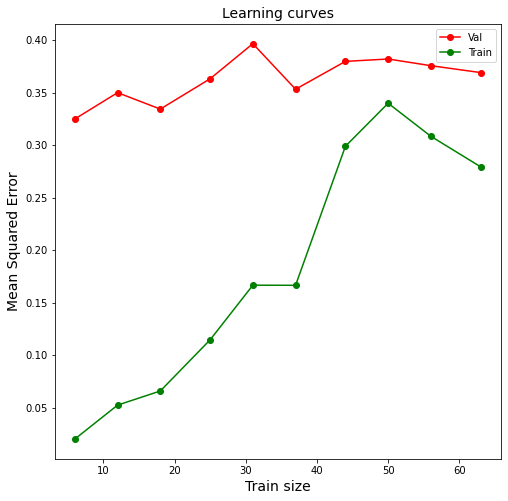

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

scaler = StandardScaler()
Xscaled = scaler.fit_transform(z_train)

# i choose d=4
d = 4
p = PolynomialRegression(d)
p.fit(z_train, mu_train)
    
y = p.predict(z_train)

lin_reg = LinearRegression()

# Ten training sample sizes from 10% to 100%
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(lin_reg, Xscaled, y, train_sizes=np.linspace(0.1, 1, 10), \
    scoring="neg_mean_squared_error", cv=10)

fig = plt.figure(figsize=(8, 8))

plt.plot(train_sizes, -test_scores_linreg.mean(1), 'o-', color="r", label="Val")
plt.plot(train_sizes, -train_scores_linreg.mean(1), 'o-', color="g", label="Train")
                   
plt.xlabel("Train size",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves',fontsize=14)
plt.legend(loc="lower right")

plt.show()

From the above graph i can conclude that:
- since the validation error is so high and seems to not drop with the increase of the dataset, the model is too simple (underfitting)
- the almost constant trend of the validation error points out that the model will not add any information if the number of datapoints increases.


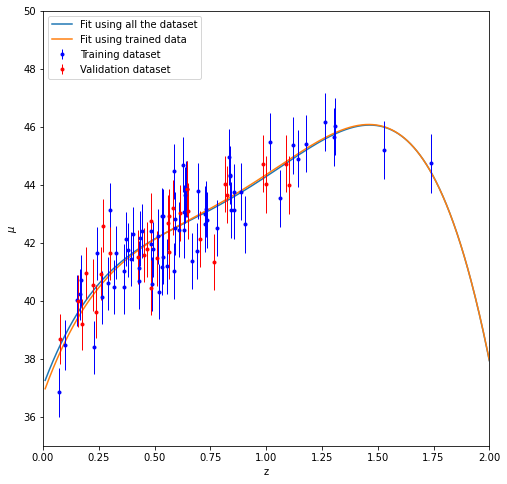

In [74]:
fig = plt.figure(figsize=(8, 8))

# Polynomial fit using all the dataset
model = PolynomialRegression(4)
model.fit(z_sample_r, mu_sample)
mu_fit = model.predict(z[:, np.newaxis])

plt.plot(z, mu_fit, label = 'Fit using all the dataset')

# Polynomial fit using only the trained fraction of the dataset 
model = PolynomialRegression(4)
model.fit(z_train, mu_train)
mu_fit = model.predict(z[:, np.newaxis])

plt.plot(z, mu_fit, label = 'Fit using trained data')


plt.errorbar(z_train, mu_train, dmu_train, fmt='.b', ecolor='black', lw=1, label='Training dataset')
plt.errorbar(z_val, mu_val, dmu_val, fmt='.r', ecolor='red', lw=1, label='Validation dataset')

plt.xlabel('z')
plt.ylabel('$\mu$')
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend(loc='upper left')
plt.show()

I notice that the last points may be seen as "outliers" by the regression methods, so i can try to remove them to see if the result changes.

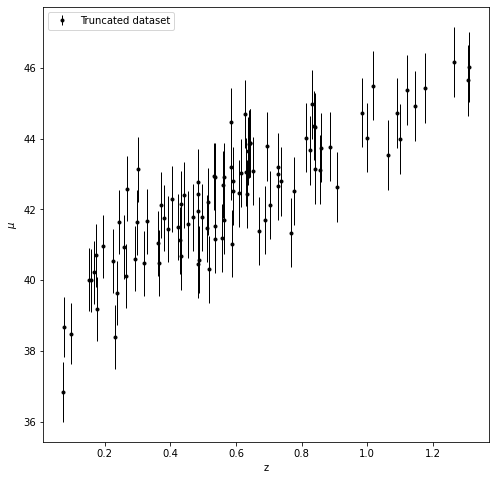

In [92]:
rm_idx = np.where(z_sample > 1.5)

z_sample_new = np.delete(z_sample, rm_idx)
mu_sample_new = np.delete(mu_sample, rm_idx)
dmu_new = np.delete(dmu, rm_idx)

fig = plt.figure(figsize=(8, 8))

plt.errorbar(z_sample_new, mu_sample_new, dmu_new, fmt='.k', ecolor='black', lw=1, label='Truncated dataset')

plt.xlabel('z')
plt.ylabel('$\mu$')
plt.legend(loc='upper left')
plt.show()

In [93]:
mu = np.array([mu_sample_new, dmu_new]).T

z_train, z_val, mudmu_train, mudmu_val = train_test_split(z_sample_new[:, np.newaxis], mu, test_size=0.3, random_state=42)
mu_train, dmu_train = mudmu_train.T
mu_val, dmu_val = mudmu_val.T

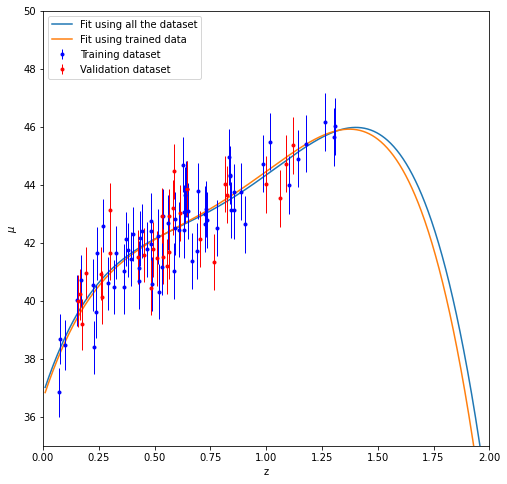

In [97]:
fig = plt.figure(figsize=(8, 8))

# Polynomial fit using all the dataset but omitting the last two
model = PolynomialRegression(4)
model.fit(z_sample_new[:, np.newaxis], mu_sample_new)
mu_fit = model.predict(z[:, np.newaxis])

plt.plot(z, mu_fit, label = 'Fit using all the dataset without the last two points')

# Polynomial fit using only the trained fraction of the dataset 
model = PolynomialRegression(4)
model.fit(z_train, mu_train)
mu_fit = model.predict(z[:, np.newaxis])

plt.plot(z, mu_fit, label = 'Fit using trained data')


plt.errorbar(z_train, mu_train, dmu_train, fmt='.b', ecolor='black', lw=1, label='Training dataset')
plt.errorbar(z_val, mu_val, dmu_val, fmt='.r', ecolor='red', lw=1, label='Validation dataset')

plt.xlabel('z')
plt.ylabel('$\mu$')
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend(loc='upper left')
plt.show()

Overall, the functional form of the fit curve seems to be very similar to the previous one, but i can notice a little change in the final part of it, in respect to the fit with the full dataset. I can plot them in order to see better this changes.

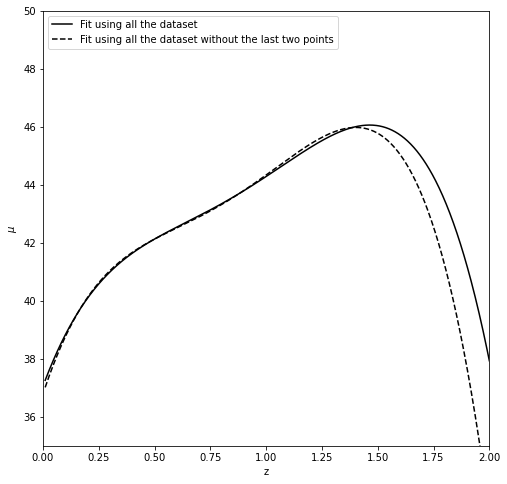

In [99]:
fig = plt.figure(figsize=(8, 8))

# Polynomial fit using all the dataset
model = PolynomialRegression(4)
model.fit(z_sample_r, mu_sample)
mu_fit = model.predict(z[:, np.newaxis])

plt.plot(z, mu_fit, '-k', label = 'Fit using all the dataset')

# Polynomial fit using all the dataset but omitting the last two
model = PolynomialRegression(4)
model.fit(z_sample_new[:, np.newaxis], mu_sample_new)
mu_fit = model.predict(z[:, np.newaxis])

plt.plot(z, mu_fit, '--k', label = 'Fit using all the dataset without the last two points')

plt.xlabel('z')
plt.ylabel('$\mu$')
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend(loc='upper left')
plt.show()